In [1]:
cd ~/DATA/Sentinel/ 

/data/store01/data_dirs/students/ucfafyi/Sentinel


In [2]:
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
from smoothn import *
import pylab as plt
%matplotlib inline
import mgrs
import pandas as pd
from scipy import interpolate
from nicer_plot import *

In [10]:
data = parallel_rw_pkl(None, 'Munic0212_atm', 'r')
lat, lon = 48.14778,11.572778
tx = mgrs.MGRS()
mg = tx.toMGRS(lat,lon, MGRSPrecision=4)
imgx = 9999-int(mg[-4:]); imgy = int(mg[-8:-4])
imgx,imgy

(6406, 9136)

In [11]:
aerosols = np.array([[i[0], i[1], i[2][0][0]]for i in data]).T
aero_map = np.zeros((1000, 1000))
aero_map[:,:] = np.nan
aero_map[(aerosols[0]-6001).astype(int), (aerosols[1]-9001).astype(int)] = aerosols[2]
weights = (~np.isnan(aero_map)).astype('float')
sm_aaro = smoothn(aero_map,s=10,W=weights, verbose=True, isrobust=True)

python/smoothn.py:186: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if W != None:
python/smoothn.py:204: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if W == None:


tol 1.0 nit 0
tol 2.34118786805 nit 1
tol 2.10101854316 nit 2
tol 1.99559982208 nit 3
tol 1.45559038359 nit 4
tol 1.15246692844 nit 5
tol 0.772675215416 nit 6
tol 0.553539282439 nit 7
tol 0.383735771579 nit 8
tol 0.269846597235 nit 9
tol 0.197940351256 nit 10
tol 0.141767721567 nit 11
tol 0.11148774966 nit 12
tol 0.0840896322487 nit 13
tol 0.071603968926 nit 14
tol 0.0583171171927 nit 15
tol 0.0529908264828 nit 16
tol 0.0462818505181 nit 17
tol 0.0435457630164 nit 18
tol 0.0397722385285 nit 19
tol 0.0379549400401 nit 20
tol 0.0355337511712 nit 21
tol 0.0341055387948 nit 22
tol 0.0323736006361 nit 23
tol 0.0311711299284 nit 24
tol 0.02983662471 nit 25
tol 0.0288005761543 nit 26
tol 0.0277216090666 nit 27
tol 0.0268210074282 nit 28
tol 0.0259203778766 nit 29
tol 0.0251329311354 nit 30
tol 0.0243641866972 nit 31
tol 0.0236716477768 nit 32
tol 0.0230045092818 nit 33
tol 0.0223916050214 nit 34
tol 0.0218051086723 nit 35
tol 0.0212591404987 nit 36
tol 0.0207381033593 nit 37
tol 0.02024860854

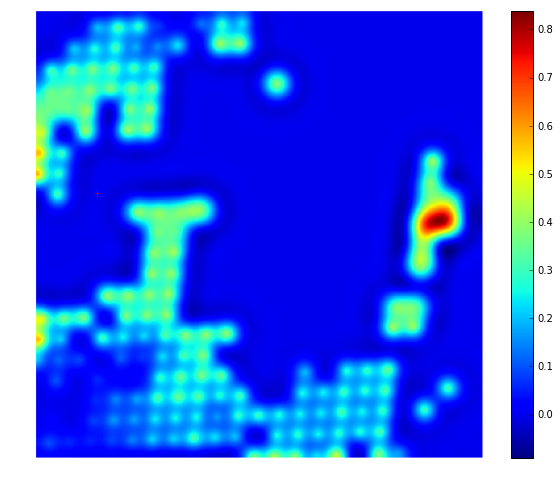

In [12]:
plt.figure(figsize=(10,8))
plt.imshow(sm_aaro[0]*10, interpolation='None')
plt.plot(136,406 ,'r+')
plt.xlim(0,1000)
plt.ylim(1000,0)
plt.axis('off')
plt.colorbar()

In [20]:
mean(aerosols[2])

0.20177649250913762

In [18]:
0.206 # mean from that day 

0.206

In [19]:
pas = ['Date(dd-mm-yyyy)', 'Time(hh:mm:ss)', 'Julian_Day', 'AOT_1640', 
       'AOT_1020', 'AOT_870', 'AOT_675', 'AOT_667', 'AOT_555', 'AOT_551', 'AOT_532', 
       'AOT_531', 'AOT_500', 'AOT_490', 'AOT_443', 'AOT_440', 'AOT_412', 'AOT_380', 'AOT_340', 'Water(cm)']
df = pd.read_csv('160212_160212_Munich_University.dubovik', skiprows=3, na_values=["N/A"])
date = df[pas]
aero = np.array(date.AOT_1020),np.array(date.AOT_870),np.array(date.AOT_675),np.array(date.AOT_500),np.array(date.AOT_440),np.array(date.AOT_380),np.array(date.AOT_340)
wv = [ 1020,870, 675, 500, 440, 380, 340]
aero = np.array(aero).T
date

,Date(dd-mm-yyyy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,AOT_532,AOT_531,AOT_500,AOT_490,AOT_443,AOT_440,AOT_412,AOT_380,AOT_340,Water(cm)
0,12:02:2016,11:30:28,43.479491,NaN,0.024171,0.023137,0.030179,NaN,NaN,NaN,NaN,NaN,0.044671,NaN,NaN,0.061783,NaN,0.070124,0.060566,0.592472
1,12:02:2016,12:30:27,43.521146,NaN,0.020747,0.019613,0.025747,NaN,NaN,NaN,NaN,NaN,0.037595,NaN,NaN,0.052172,NaN,0.057540,0.047484,0.538966
